# 📊 학생 중도 이탈 예측 - EDA 및 시각화

이 노트북은 학생 데이터셋에 대한 탐색적 데이터 분석(EDA)과 시각화를 수행합니다.

## 목차
1. 데이터 로딩 및 기본 정보
2. 타깃 변수 분석
3. 수치형 변수 분석
4. 범주형 변수 분석
5. 상관관계 분석
6. 결측치 및 이상치 분석
7. 주요 인사이트

In [1]:
# 라이브러리 임포트
import warnings
warnings.filterwarnings('ignore')

from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (Windows)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 스타일 설정
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print('✅ 라이브러리 임포트 완료')

✅ 라이브러리 임포트 완료


## 1. 데이터 로딩 및 기본 정보

In [2]:
# 데이터 로드
DATA_PATH = Path('../data/dataset.csv')

if not DATA_PATH.exists():
    raise FileNotFoundError(f'데이터 파일을 찾을 수 없습니다: {DATA_PATH}')

df = pd.read_csv(DATA_PATH)
print(f'✅ 데이터 로드 완료: {df.shape[0]:,}행 × {df.shape[1]}열\n')

# 기본 정보
print('=== 데이터셋 기본 정보 ===')
print(df.info())

✅ 데이터 로드 완료: 4,424행 × 35열

=== 데이터셋 기본 정보 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  


In [3]:
# 상위 5개 행 확인
print('=== 데이터 미리보기 ===')
df.head()

=== 데이터 미리보기 ===


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
# 기술 통계량
print('=== 수치형 변수 기술 통계량 ===')
df.describe().T

=== 수치형 변수 기술 통계량 ===


,count,mean,std,min,25%,50%,75%,max
Marital status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application mode,4424.0,6.886980,5.298964,1.00,1.00,8.000000,12.000000,18.000000
Application order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,9.899186,4.331792,1.00,6.00,10.000000,13.000000,17.000000
Daytime/evening attendance,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous qualification,4424.0,2.531420,3.963707,1.00,1.00,1.000000,1.000000,17.000000
Nacionality,4424.0,1.254521,1.748447,1.00,1.00,1.000000,1.000000,21.000000
Mother's qualification,4424.0,12.322107,9.026251,1.00,2.00,13.000000,22.000000,29.000000
Father's qualification,4424.0,16.455244,11.044800,1.00,3.00,14.000000,27.000000,34.000000
Mother's occupation,4424.0,7.317812,3.997828,1.00,5.00,6.000000,10.000000,32.000000


## 2. 타깃 변수 분석

In [5]:
# 타깃 변수 확인
if 'Target' not in df.columns:
    raise KeyError('Target 컬럼이 존재하지 않습니다.')

print('=== Target 변수 분포 ===')
print(df['Target'].value_counts())
print(f'\n비율:\n{df["Target"].value_counts(normalize=True) * 100}')

=== Target 변수 분포 ===
Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

비율:
Target
Graduate    49.932188
Dropout     32.120253
Enrolled    17.947559
Name: proportion, dtype: float64


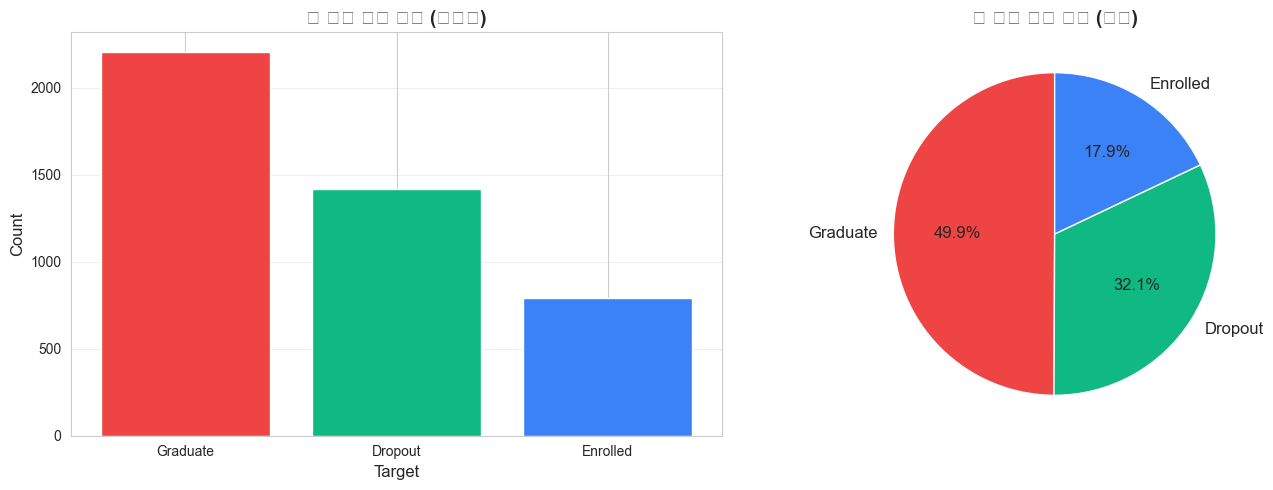

✅ 그래프 저장: figures/target_distribution.png


In [6]:
# 타깃 분포 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 막대 그래프
target_counts = df['Target'].value_counts()
colors = ['#ef4444', '#10b981', '#3b82f6']
axes[0].bar(target_counts.index, target_counts.values, color=colors)
axes[0].set_title('📊 타깃 변수 분포 (절대값)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Target', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)

# 원형 차트
axes[1].pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%',
            colors=colors, startangle=90, textprops={'fontsize': 12})
axes[1].set_title('📊 타깃 변수 분포 (비율)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../figures/target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print('✅ 그래프 저장: figures/target_distribution.png')

In [7]:
# Enrolled 제거 후 분석용 데이터 생성
df_clean = df[df['Target'] != 'Enrolled'].copy()
print(f'\n=== Enrolled 제거 후 ===')
print(f'제거된 행 수: {len(df) - len(df_clean):,}')
print(f'남은 데이터: {len(df_clean):,}행')
print(f'\nTarget 분포:')
print(df_clean['Target'].value_counts())


=== Enrolled 제거 후 ===
제거된 행 수: 794
남은 데이터: 3,630행

Target 분포:
Target
Graduate    2209
Dropout     1421
Name: count, dtype: int64


## 3. 수치형 변수 분석

In [8]:
# 수치형 변수 추출
numeric_cols = df_clean.select_dtypes(include=['number']).columns.tolist()
print(f'=== 수치형 변수 ({len(numeric_cols)}개) ===')
for i, col in enumerate(numeric_cols, 1):
    print(f'{i}. {col}')

=== 수치형 변수 (34개) ===
1. Marital status
2. Application mode
3. Application order
4. Course
5. Daytime/evening attendance
6. Previous qualification
7. Nacionality
8. Mother's qualification
9. Father's qualification
10. Mother's occupation
11. Father's occupation
12. Displaced
13. Educational special needs
14. Debtor
15. Tuition fees up to date
16. Gender
17. Scholarship holder
18. Age at enrollment
19. International
20. Curricular units 1st sem (credited)
21. Curricular units 1st sem (enrolled)
22. Curricular units 1st sem (evaluations)
23. Curricular units 1st sem (approved)
24. Curricular units 1st sem (grade)
25. Curricular units 1st sem (without evaluations)
26. Curricular units 2nd sem (credited)
27. Curricular units 2nd sem (enrolled)
28. Curricular units 2nd sem (evaluations)
29. Curricular units 2nd sem (approved)
30. Curricular units 2nd sem (grade)
31. Curricular units 2nd sem (without evaluations)
32. Unemployment rate
33. Inflation rate
34. GDP


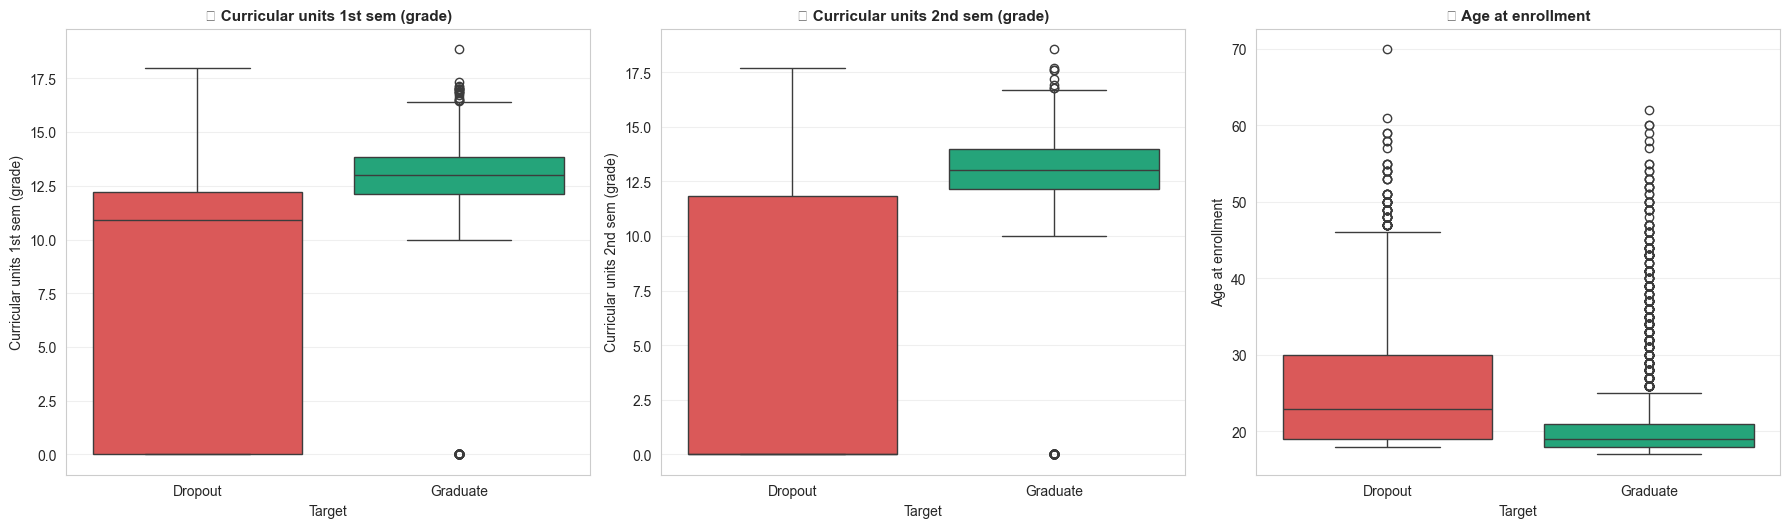

✅ 그래프 저장: figures/numeric_distribution_by_target.png


In [9]:
# 타깃별 수치형 변수 분포 비교 (주요 변수)
important_numeric = [
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (grade)',
    'Admission grade',
    'Previous qualification (grade)',
    'Age at enrollment'
]

# 존재하는 컬럼만 필터링
important_numeric = [col for col in important_numeric if col in numeric_cols]

if important_numeric:
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.flatten()

    for idx, col in enumerate(important_numeric[:6]):
        sns.boxplot(data=df_clean, x='Target', y=col, ax=axes[idx], palette=['#ef4444', '#10b981'])
        axes[idx].set_title(f'📊 {col}', fontsize=11, fontweight='bold')
        axes[idx].set_xlabel('Target', fontsize=10)
        axes[idx].set_ylabel(col, fontsize=10)
        axes[idx].grid(axis='y', alpha=0.3)

    # 빈 서브플롯 숨기기
    for idx in range(len(important_numeric), 6):
        axes[idx].set_visible(False)

    plt.tight_layout()
    plt.savefig('../figures/numeric_distribution_by_target.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print('✅ 그래프 저장: figures/numeric_distribution_by_target.png')

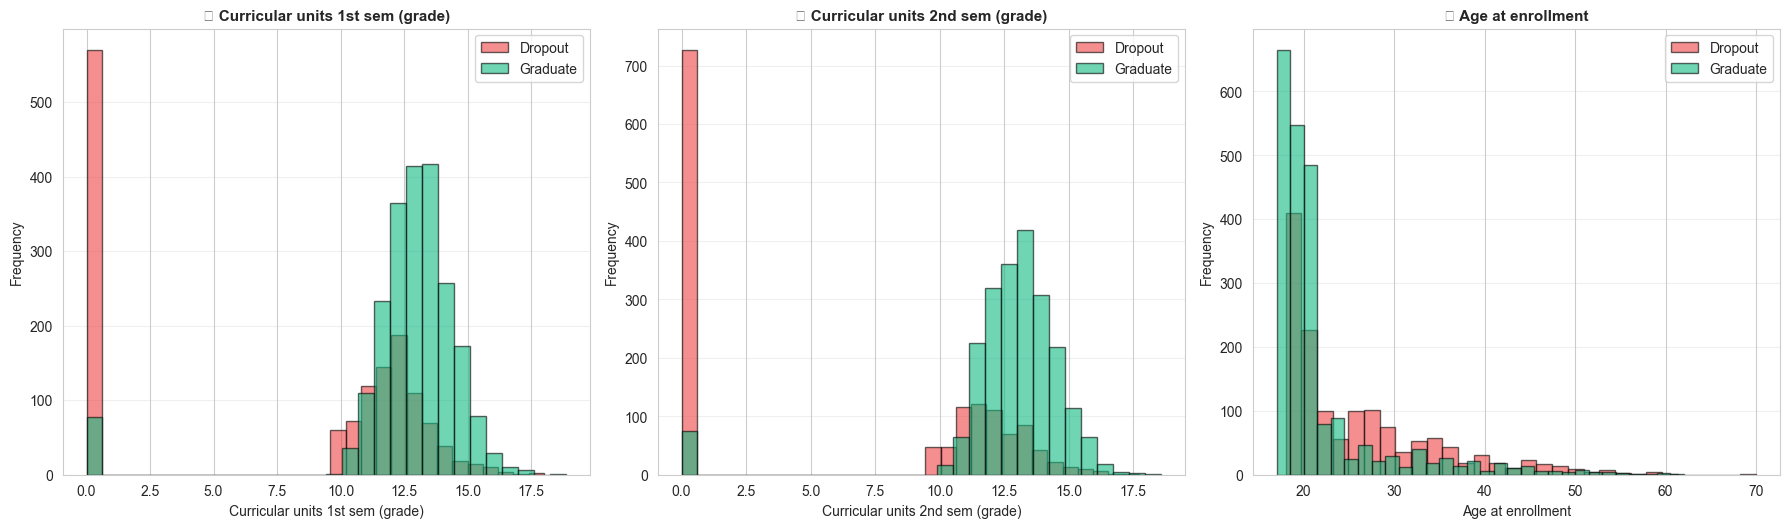

✅ 그래프 저장: figures/numeric_histogram_by_target.png


In [10]:
# 수치형 변수 히스토그램 (타깃별 구분)
if len(important_numeric) > 0:
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.flatten()

    for idx, col in enumerate(important_numeric[:6]):
        for target, color in zip(['Dropout', 'Graduate'], ['#ef4444', '#10b981']):
            data = df_clean[df_clean['Target'] == target][col]
            axes[idx].hist(data, alpha=0.6, label=target, bins=30, color=color, edgecolor='black')
        
        axes[idx].set_title(f'📊 {col}', fontsize=11, fontweight='bold')
        axes[idx].set_xlabel(col, fontsize=10)
        axes[idx].set_ylabel('Frequency', fontsize=10)
        axes[idx].legend()
        axes[idx].grid(axis='y', alpha=0.3)

    # 빈 서브플롯 숨기기
    for idx in range(len(important_numeric), 6):
        axes[idx].set_visible(False)

    plt.tight_layout()
    plt.savefig('../figures/numeric_histogram_by_target.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print('✅ 그래프 저장: figures/numeric_histogram_by_target.png')

## 4. 범주형 변수 분석

In [11]:
# 범주형 변수 추출
categorical_cols = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols = [col for col in categorical_cols if col != 'Target']

print(f'=== 범주형 변수 ({len(categorical_cols)}개) ===')
for i, col in enumerate(categorical_cols, 1):
    unique_count = df_clean[col].nunique()
    print(f'{i}. {col}: {unique_count}개 고유값')

=== 범주형 변수 (0개) ===


In [12]:
# 주요 범주형 변수 시각화
important_categorical = [
    'Marital status',
    'Application mode',
    "Mother's qualification",
    "Father's qualification",
    'Daytime/evening attendance',
    'Gender'
]

# 존재하는 컬럼만 필터링
important_categorical = [col for col in important_categorical if col in categorical_cols]

if important_categorical:
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.flatten()

    for idx, col in enumerate(important_categorical[:6]):
        # 카운트 데이터 생성
        ct = pd.crosstab(df_clean[col], df_clean['Target'], normalize='index') * 100
        
        ct.plot(kind='bar', ax=axes[idx], color=['#ef4444', '#10b981'], edgecolor='black')
        axes[idx].set_title(f'📊 {col}', fontsize=11, fontweight='bold')
        axes[idx].set_xlabel(col, fontsize=10)
        axes[idx].set_ylabel('Percentage (%)', fontsize=10)
        axes[idx].legend(title='Target', loc='upper right')
        axes[idx].grid(axis='y', alpha=0.3)
        axes[idx].tick_params(axis='x', rotation=45)

    # 빈 서브플롯 숨기기
    for idx in range(len(important_categorical), 6):
        axes[idx].set_visible(False)

    plt.tight_layout()
    plt.savefig('../figures/categorical_distribution_by_target.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print('✅ 그래프 저장: figures/categorical_distribution_by_target.png')

## 5. 상관관계 분석

In [13]:
# 타깃 인코딩 (상관관계 분석용)
df_corr = df_clean.copy()
df_corr['Target_encoded'] = df_corr['Target'].map({'Dropout': 0, 'Graduate': 1})

# 수치형 컬럼만 선택
numeric_cols_with_target = numeric_cols + ['Target_encoded']
corr_matrix = df_corr[numeric_cols_with_target].corr()

print('=== 타깃과의 상관계수 (상위 15개) ===')
target_corr = corr_matrix['Target_encoded'].sort_values(ascending=False)
print(target_corr[1:16])  # Target_encoded 제외

=== 타깃과의 상관계수 (상위 15개) ===
Curricular units 2nd sem (approved)       0.653995
Curricular units 2nd sem (grade)          0.605350
Curricular units 1st sem (approved)       0.554881
Curricular units 1st sem (grade)          0.519927
Tuition fees up to date                   0.442138
Scholarship holder                        0.313018
Curricular units 2nd sem (enrolled)       0.182897
Curricular units 1st sem (enrolled)       0.161074
Displaced                                 0.126113
Curricular units 2nd sem (evaluations)    0.119239
Application order                         0.094355
Daytime/evening attendance                0.084496
Father's occupation                       0.073238
Mother's occupation                       0.064195
Curricular units 1st sem (evaluations)    0.059786
Name: Target_encoded, dtype: float64


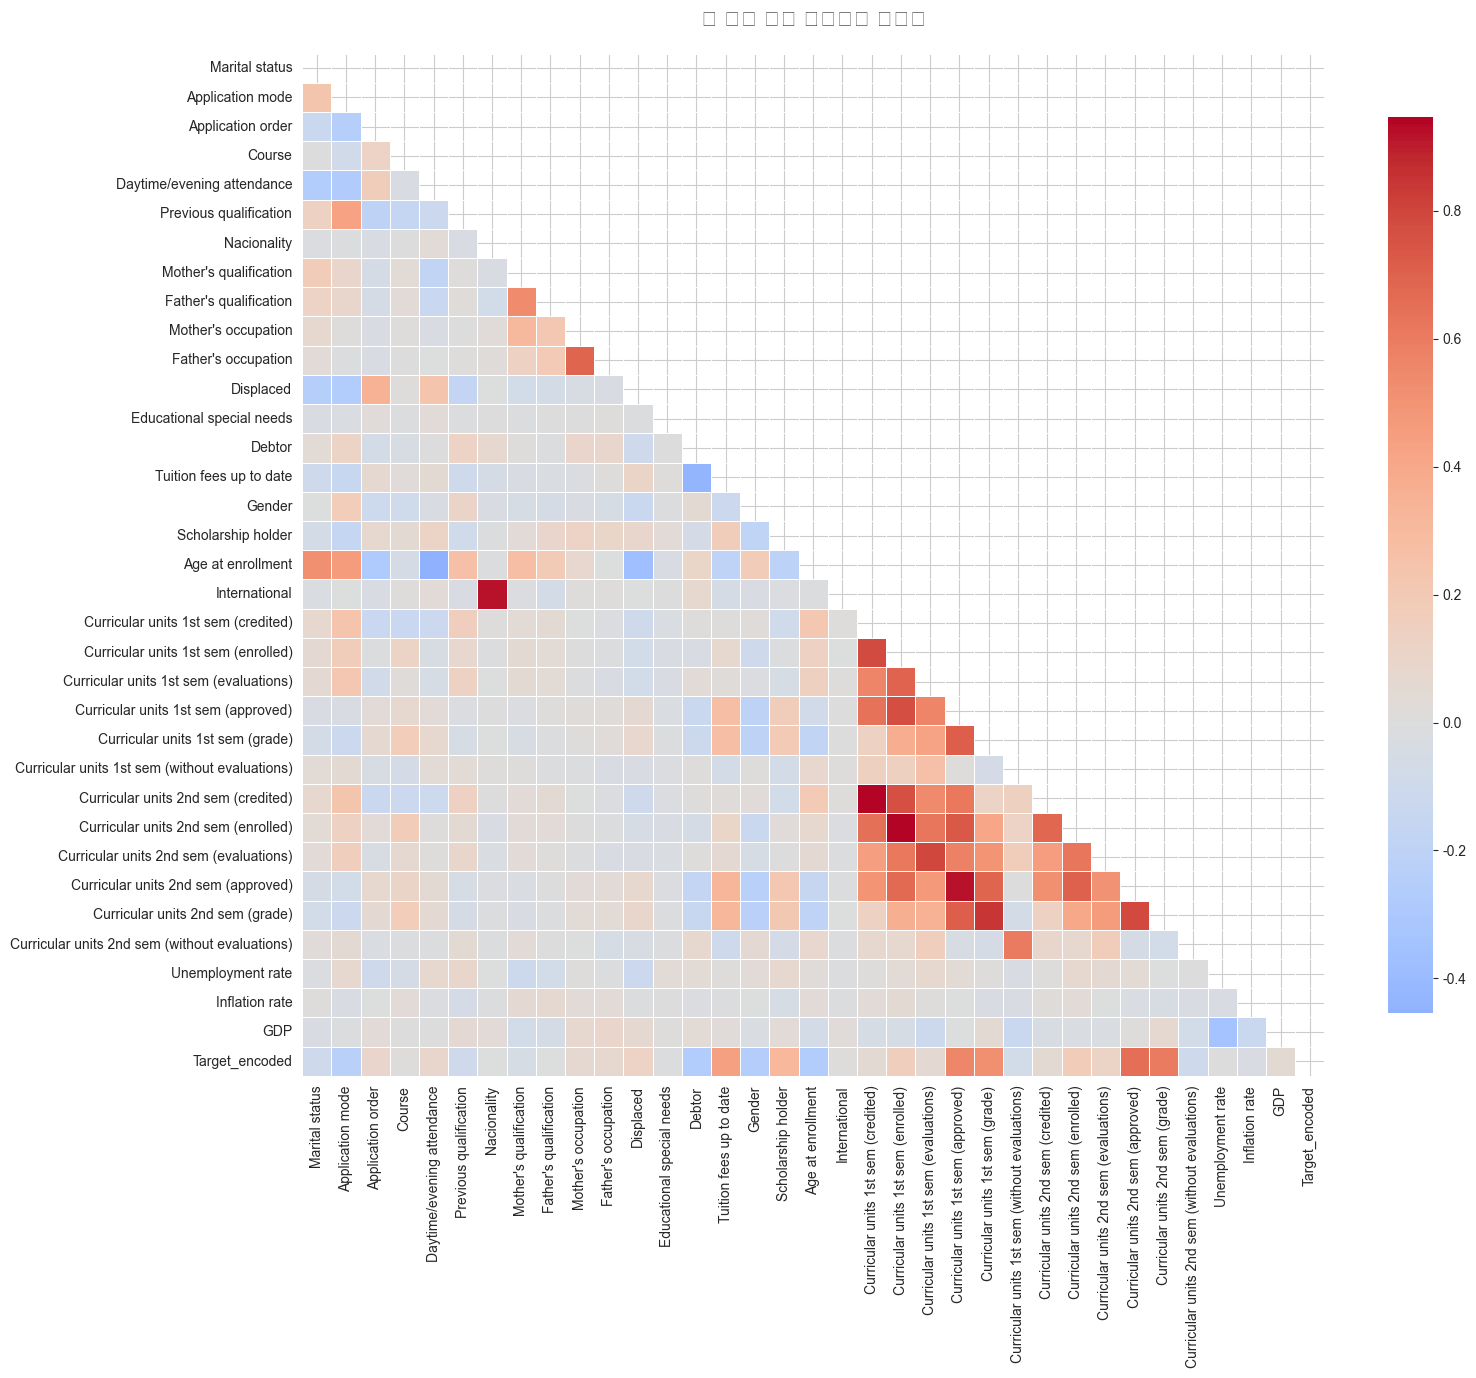

✅ 그래프 저장: figures/correlation_heatmap_full.png


In [14]:
# 상관관계 히트맵 (전체)
plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('🔥 전체 변수 상관관계 히트맵', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('../figures/correlation_heatmap_full.png', dpi=300, bbox_inches='tight')
plt.show()

print('✅ 그래프 저장: figures/correlation_heatmap_full.png')

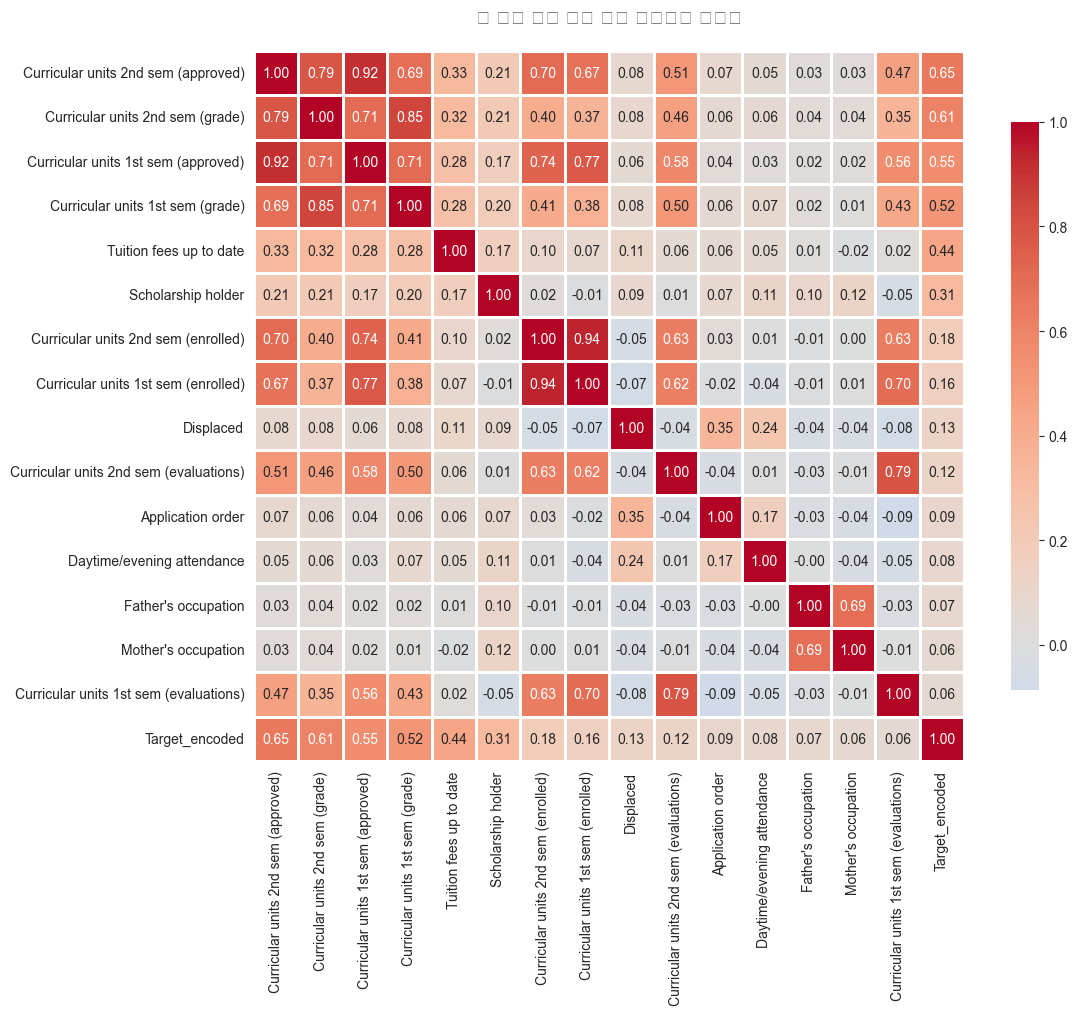

✅ 그래프 저장: figures/correlation_heatmap_top.png


In [15]:
# 타깃과 상관관계 높은 변수들만 히트맵
top_corr_features = target_corr[1:16].index.tolist()  # 상위 15개
top_corr_features.append('Target_encoded')

plt.figure(figsize=(12, 10))
corr_subset = df_corr[top_corr_features].corr()
sns.heatmap(corr_subset, annot=True, cmap='coolwarm', center=0, fmt='.2f',
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('🔥 타깃 관련 주요 변수 상관관계 히트맵', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('../figures/correlation_heatmap_top.png', dpi=300, bbox_inches='tight')
plt.show()

print('✅ 그래프 저장: figures/correlation_heatmap_top.png')

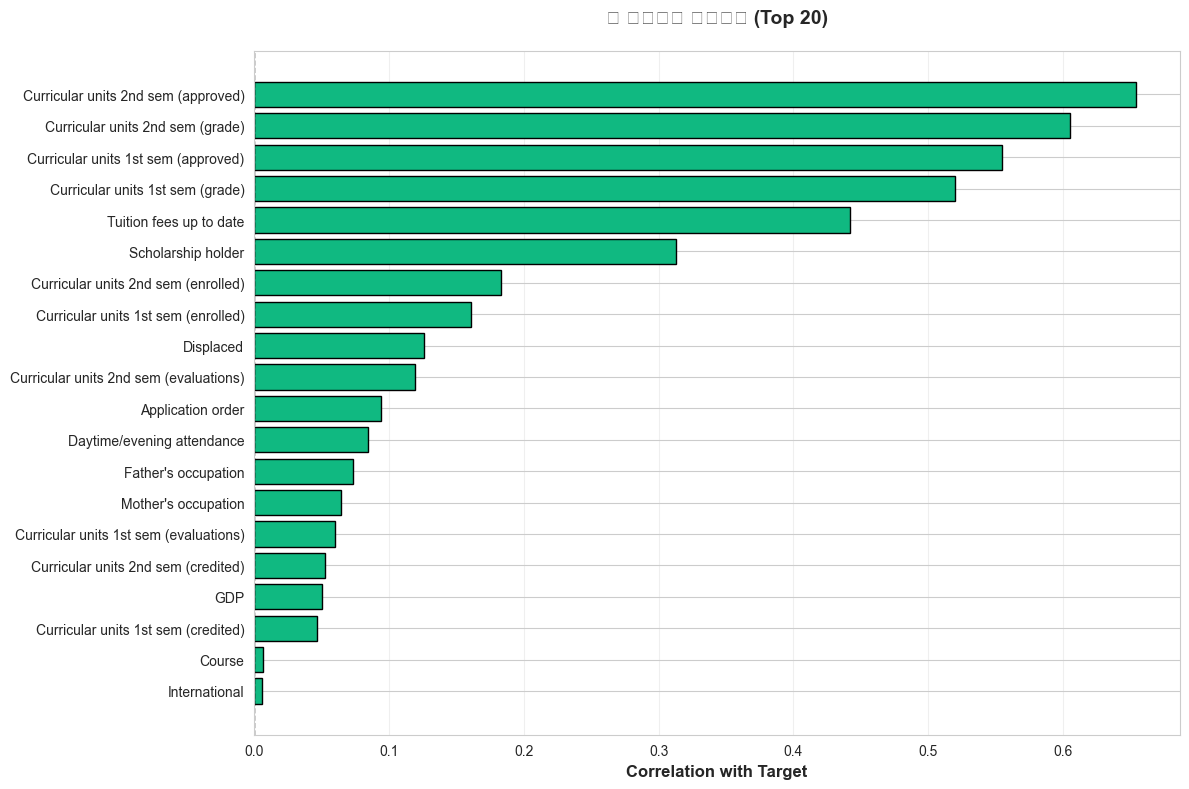

✅ 그래프 저장: figures/target_correlation_bar.png


In [16]:
# 타깃과의 상관계수 막대 그래프
plt.figure(figsize=(12, 8))
target_corr_sorted = target_corr[1:21].sort_values()  # 상위 20개
colors_corr = ['#ef4444' if x < 0 else '#10b981' for x in target_corr_sorted.values]

plt.barh(range(len(target_corr_sorted)), target_corr_sorted.values, color=colors_corr, edgecolor='black')
plt.yticks(range(len(target_corr_sorted)), target_corr_sorted.index, fontsize=10)
plt.xlabel('Correlation with Target', fontsize=12, fontweight='bold')
plt.title('📊 타깃과의 상관계수 (Top 20)', fontsize=14, fontweight='bold', pad=20)
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('../figures/target_correlation_bar.png', dpi=300, bbox_inches='tight')
plt.show()

print('✅ 그래프 저장: figures/target_correlation_bar.png')

## 6. 결측치 및 이상치 분석

In [17]:
# 결측치 분석
missing_summary = df_clean.isnull().sum()
missing_summary = missing_summary[missing_summary > 0].sort_values(ascending=False)

if len(missing_summary) > 0:
    print('=== 결측치 현황 ===')
    print(missing_summary)
    
    # 결측치 시각화
    plt.figure(figsize=(12, 6))
    plt.bar(range(len(missing_summary)), missing_summary.values, color='#ef4444', edgecolor='black')
    plt.xticks(range(len(missing_summary)), missing_summary.index, rotation=45, ha='right')
    plt.xlabel('Variables', fontsize=12, fontweight='bold')
    plt.ylabel('Missing Count', fontsize=12, fontweight='bold')
    plt.title('🔍 결측치 분포', fontsize=14, fontweight='bold', pad=20)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.savefig('../figures/missing_values.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print('✅ 그래프 저장: figures/missing_values.png')
else:
    print('✅ 결측치가 없습니다!')

✅ 결측치가 없습니다!


In [18]:
# 중복 행 확인
duplicates = df_clean.duplicated().sum()
print(f'\n=== 중복 행 ===')
print(f'중복 행 개수: {duplicates:,}')

if duplicates > 0:
    print(f'중복 비율: {duplicates / len(df_clean) * 100:.2f}%')


=== 중복 행 ===
중복 행 개수: 0


In [19]:
# 이상치 분석 (IQR 방법)
print('\n=== 이상치 분석 (IQR 기준) ===')

outlier_summary = []
for col in numeric_cols[:10]:  # 상위 10개 수치형 변수만
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
    outlier_count = len(outliers)
    outlier_pct = outlier_count / len(df_clean) * 100
    
    outlier_summary.append({
        'Variable': col,
        'Outlier_Count': outlier_count,
        'Outlier_Pct': f'{outlier_pct:.2f}%'
    })

outlier_df = pd.DataFrame(outlier_summary).sort_values('Outlier_Count', ascending=False)
print(outlier_df.head(10))


=== 이상치 분석 (IQR 기준) ===
                     Variable  Outlier_Count Outlier_Pct
5      Previous qualification            611      16.83%
2           Application order            468      12.89%
0              Marital status            431      11.87%
4  Daytime/evening attendance            408      11.24%
6                 Nacionality             86       2.37%
9         Mother's occupation             46       1.27%
1            Application mode              0       0.00%
3                      Course              0       0.00%
7      Mother's qualification              0       0.00%
8      Father's qualification              0       0.00%


## 7. 주요 인사이트 및 요약

In [20]:
print('\n' + '='*60)
print('📌 주요 인사이트 요약')
print('='*60)

print(f'\n1. 데이터셋 크기: {len(df_clean):,}행 × {len(df_clean.columns)}열')
print(f'   - Dropout: {(df_clean["Target"] == "Dropout").sum():,}명')
print(f'   - Graduate: {(df_clean["Target"] == "Graduate").sum():,}명')

print(f'\n2. 변수 구성:')
print(f'   - 수치형 변수: {len(numeric_cols)}개')
print(f'   - 범주형 변수: {len(categorical_cols)}개')

print(f'\n3. 데이터 품질:')
print(f'   - 결측치: {"없음" if len(missing_summary) == 0 else f"{len(missing_summary)}개 변수에 존재"}')
print(f'   - 중복 행: {duplicates:,}개')

print(f'\n4. 타깃과 강한 상관관계를 보이는 변수 (Top 5):')
for i, (var, corr) in enumerate(target_corr[1:6].items(), 1):
    print(f'   {i}. {var}: {corr:.3f}')

print('\n✅ EDA 완료!')
print('='*60)


📌 주요 인사이트 요약

1. 데이터셋 크기: 3,630행 × 35열
   - Dropout: 1,421명
   - Graduate: 2,209명

2. 변수 구성:
   - 수치형 변수: 34개
   - 범주형 변수: 0개

3. 데이터 품질:
   - 결측치: 없음
   - 중복 행: 0개

4. 타깃과 강한 상관관계를 보이는 변수 (Top 5):
   1. Curricular units 2nd sem (approved): 0.654
   2. Curricular units 2nd sem (grade): 0.605
   3. Curricular units 1st sem (approved): 0.555
   4. Curricular units 1st sem (grade): 0.520
   5. Tuition fees up to date: 0.442

✅ EDA 완료!


In [21]:
# 저장된 그래프 목록
print('\n📊 저장된 시각화 파일:')
figure_files = [
    'target_distribution.png',
    'numeric_distribution_by_target.png',
    'numeric_histogram_by_target.png',
    'categorical_distribution_by_target.png',
    'correlation_heatmap_full.png',
    'correlation_heatmap_top.png',
    'target_correlation_bar.png',
    'missing_values.png' if len(missing_summary) > 0 else None
]

for i, filename in enumerate([f for f in figure_files if f], 1):
    print(f'{i}. figures/{filename}')


📊 저장된 시각화 파일:
1. figures/target_distribution.png
2. figures/numeric_distribution_by_target.png
3. figures/numeric_histogram_by_target.png
4. figures/categorical_distribution_by_target.png
5. figures/correlation_heatmap_full.png
6. figures/correlation_heatmap_top.png
7. figures/target_correlation_bar.png
